In [20]:
import pandas as pd # needed for most operation
import numpy as np # needed for some array operations
import pyreadstat
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
file_path_data = 'time_series_375_preprocess_en.xlsx'
data = pd.read_excel(file_path_data)

In [3]:
data['PATIENT_ID'].fillna(method='ffill', inplace=True)

In [4]:
filled_data = data.groupby('PATIENT_ID').first().fillna(method='ffill')

In [5]:
filled_data.head()

,RE_DATE,age,gender,Admission time,Discharge time,outcome,Hypersensitive cardiac troponinI,hemoglobin,Serum chloride,Prothrombin time,...,mean corpuscular hemoglobin,Activation of partial thromboplastin time,Hypersensitive c-reactive protein,HIV antibody quantification,serum sodium,thrombocytocrit,ESR,glutamic-pyruvic transaminase,eGFR,creatinine
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
1.0,2020-01-31 01:09:00,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,19.9,136.0,103.1,13.9,...,31.9,37.9,43.1,0.09,137.7,0.12,41.0,16.0,46.6,130.0
2.0,2020-02-05 07:34:00,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,16.9,135.0,99.9,14.3,...,31.9,42.3,27.4,0.09,138.2,0.30,40.0,38.0,81.3,88.0
3.0,2020-01-23 14:31:00,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,16.9,109.0,99.1,13.6,...,31.1,34.8,42.3,0.10,135.7,0.20,66.0,19.0,77.2,69.0
4.0,2020-02-01 05:08:00,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,4.8,84.0,100.8,16.3,...,44.2,34.8,108.2,0.11,137.9,0.10,72.0,20.0,82.0,81.0
5.0,2020-02-02 00:40:00,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,5.6,120.0,99.7,14.6,...,29.9,34.8,7.0,0.08,140.2,0.22,15.0,12.0,120.0,58.0


In [6]:
correlation_matrix = filled_data.corr()
correlation_with_target = correlation_matrix['outcome'].abs()
selected_biomarkers = correlation_with_target.nlargest(10).index
print(selected_biomarkers)

Index(['outcome', '(%)lymphocyte', 'neutrophils(%)', 'albumin',
       'Hypersensitive c-reactive protein', 'Fibrin degradation products',
       'Lactate dehydrogenase', 'neutrophils count', 'age',
       'Prothrombin activity'],
      dtype='object')


C:\Users\annek\AppData\Local\Temp\ipykernel_12900\2892958317.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filled_data.corr()


In [7]:
sorted_correlation = correlation_with_target.sort_values(ascending=False)

# Print the sorted correlation values and corresponding biomarkers
result_df = pd.DataFrame({'Biomarker': sorted_correlation.index, 'Correlation': sorted_correlation.values})
print(result_df.head(21))

                            Biomarker  Correlation
0                             outcome     1.000000
1                       (%)lymphocyte     0.670824
2                      neutrophils(%)     0.656273
3                             albumin     0.604917
4   Hypersensitive c-reactive protein     0.599735
5         Fibrin degradation products     0.599570
6               Lactate dehydrogenase     0.597795
7                   neutrophils count     0.594527
8                                 age     0.561788
9                Prothrombin activity     0.534729
10                          D-D dimer     0.528661
11                            calcium     0.449407
12             Interleukin 2 receptor     0.437448
13                               Urea     0.435409
14                               eGFR     0.434908
15                       monocytes(%)     0.412697
16                     eosinophils(%)     0.374530
17                           globulin     0.356052
18             Tumor necrosis f

C:\Users\annek\AppData\Local\Temp\ipykernel_26664\1014068549.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = filled_data.corr()['outcome'].abs().sort_values(ascending=False)


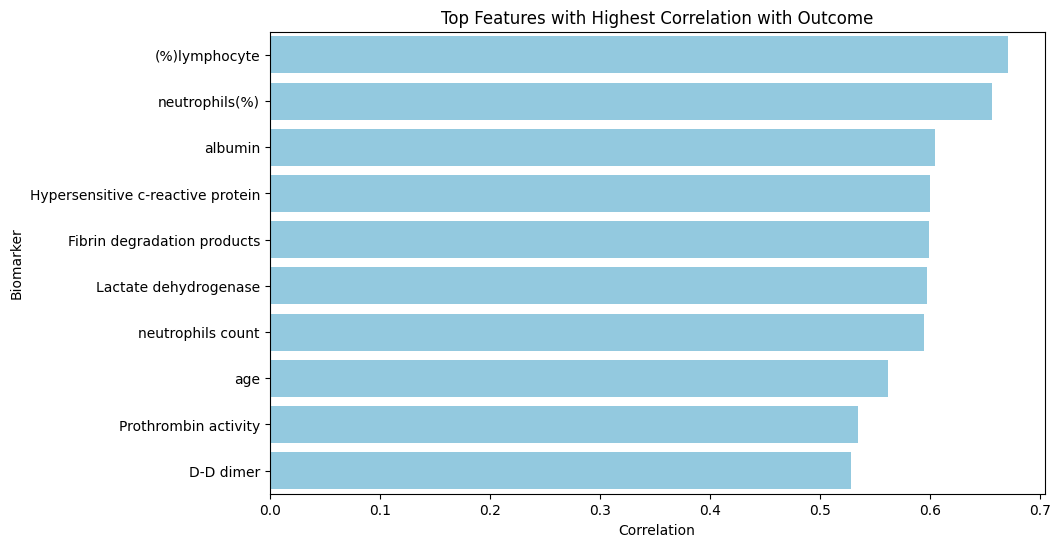

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming filled_data is your DataFrame
correlation_with_target = filled_data.corr()['outcome'].abs().sort_values(ascending=False)

# Exclude the target variable
top_biomarkers = correlation_with_target.drop('outcome').nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_biomarkers.values, y=top_biomarkers.index, color='skyblue')
plt.title('Top Features with Highest Correlation with Outcome')
plt.xlabel('Correlation')
plt.ylabel('Biomarker')
plt.show()

In [10]:
#X = filled_data[['age', 'Hypersensitive cardiac troponinI', 'procalcitonin', 'neutrophils(%)', 'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)', 'Lactate dehydrogenase', 'Interleukin 6', 'Fibrin degradation products']]
X_findfeatures = filled_data.drop(['outcome', 'RE_DATE', 'Admission time', 'Discharge time'], axis=1)
X_findfeatures = X_findfeatures.fillna(X_findfeatures.mean())  
y = filled_data['outcome']

# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X_findfeatures, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

feature_importances = rf_classifier.feature_importances_
feature_names = X_findfeatures.columns

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display or visualize the feature importance
print(importance_df.head(20))  # Display the top 20 features

                                              Feature  Importance
6                                       procalcitonin    0.128491
55                              Lactate dehydrogenase    0.091911
2                    Hypersensitive cardiac troponinI    0.072733
54  Amino-terminal brain natriuretic peptide precu...    0.062855
58                        Fibrin degradation products    0.059799
40                                  neutrophils count    0.049871
27                             White blood cell count    0.036507
48                                          D-D dimer    0.034618
20                                     neutrophils(%)    0.033467
68                  Hypersensitive c-reactive protein    0.028626
8                              Interleukin 2 receptor    0.028431
0                                                 age    0.026195
57                                      Interleukin 6    0.024053
63                       International standard ratio    0.021736
10        

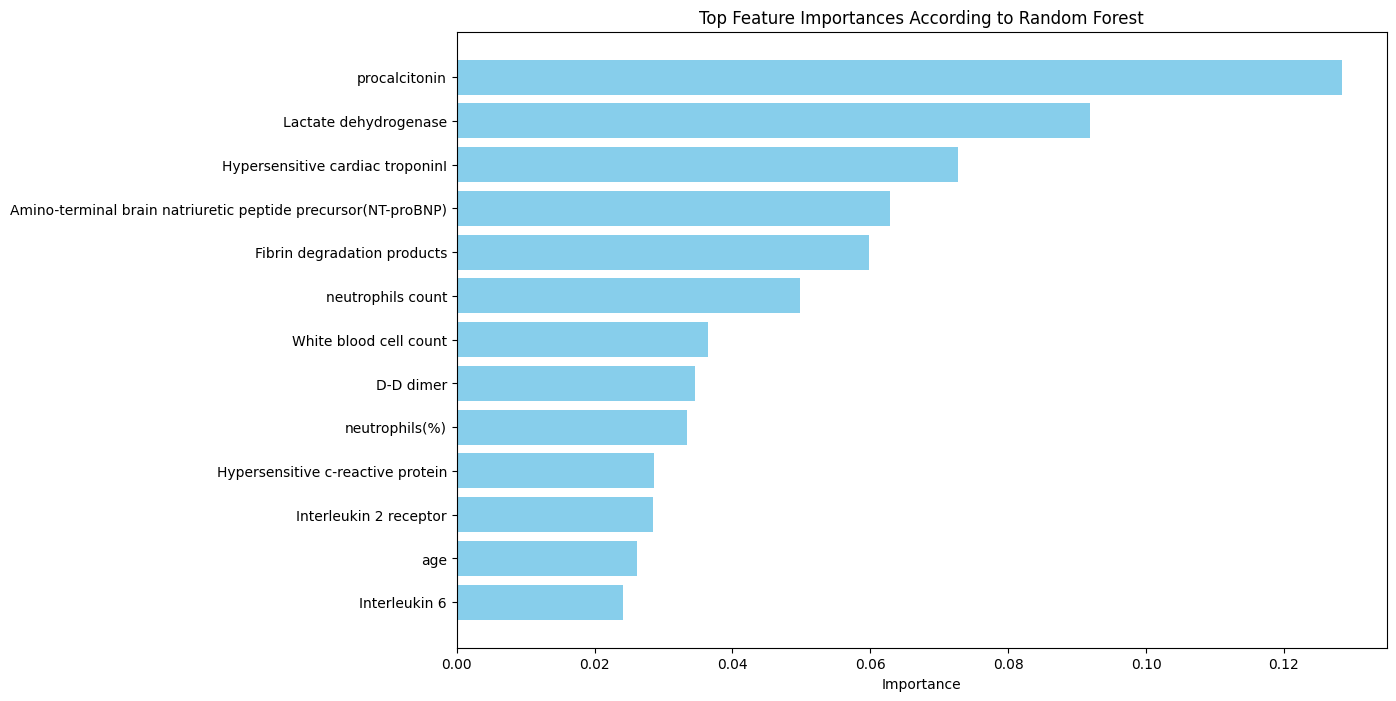

In [11]:
import matplotlib.pyplot as plt

# Display or visualize the top features
top_features = importance_df.head(13)[::-1]

plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top Feature Importances According to Random Forest')
plt.show()

In [22]:
# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_findfeatures)

# Create a LASSO model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha (regularization strength)

# Train the LASSO model
lasso_model.fit(X_standardized, y)

# Get coefficients and corresponding feature names
lasso_coefficients = lasso_model.coef_
feature_names = X_findfeatures.columns

# Display or print the coefficients
lasso_result_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso_coefficients})
lasso_result_df = lasso_result_df.sort_values(by='Coefficient', ascending=False)

print(lasso_result_df.head(6))  # Display the top 20 features


                              Feature  Coefficient
58        Fibrin degradation products     0.068118
55              Lactate dehydrogenase     0.053986
68  Hypersensitive c-reactive protein     0.053325
0                                 age     0.052703
40                  neutrophils count     0.015739
72                                ESR     0.000000


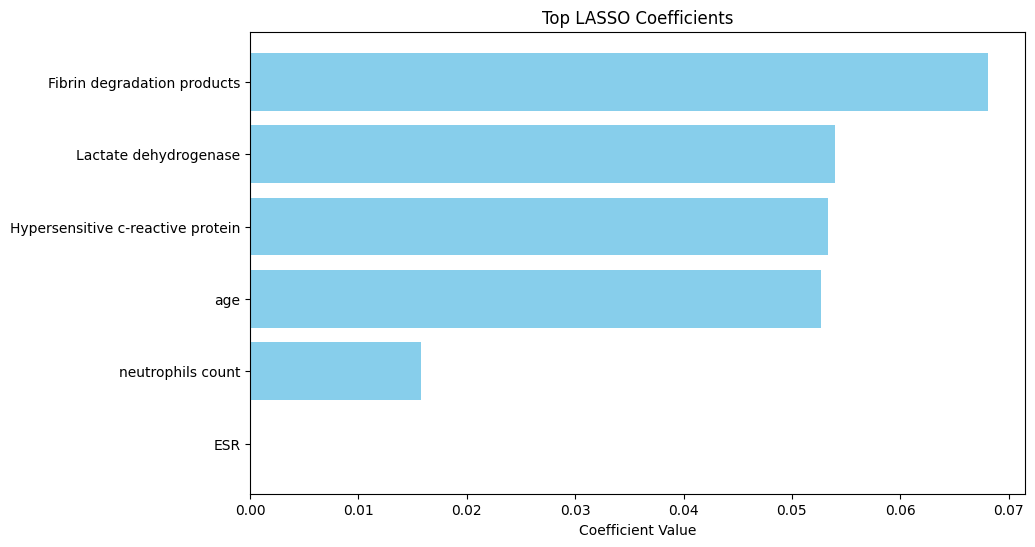

In [46]:
top_features = lasso_result_df.head(6)[::-1]

# Plot the coefficients for the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Top LASSO Coefficients')
plt.show()

In [71]:
# Assuming X and y are your feature matrix and target variable
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=10)  # Select a specific number of features
X_selected = rfe.fit_transform(X_findfeatures, y)

# Get the selected features
selected_features = pd.DataFrame(rfe.support_, index=X_findfeatures.columns, columns=['Selected'])
selected_features = selected_features[selected_features['Selected']].index.tolist()

print("Selected Features:")
print(selected_features)

Selected Features:
['age', 'Hypersensitive cardiac troponinI', 'procalcitonin', 'neutrophils(%)', '(%)lymphocyte', 'D-D dimer', 'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)', 'Lactate dehydrogenase', 'Interleukin 6', 'Fibrin degradation products']


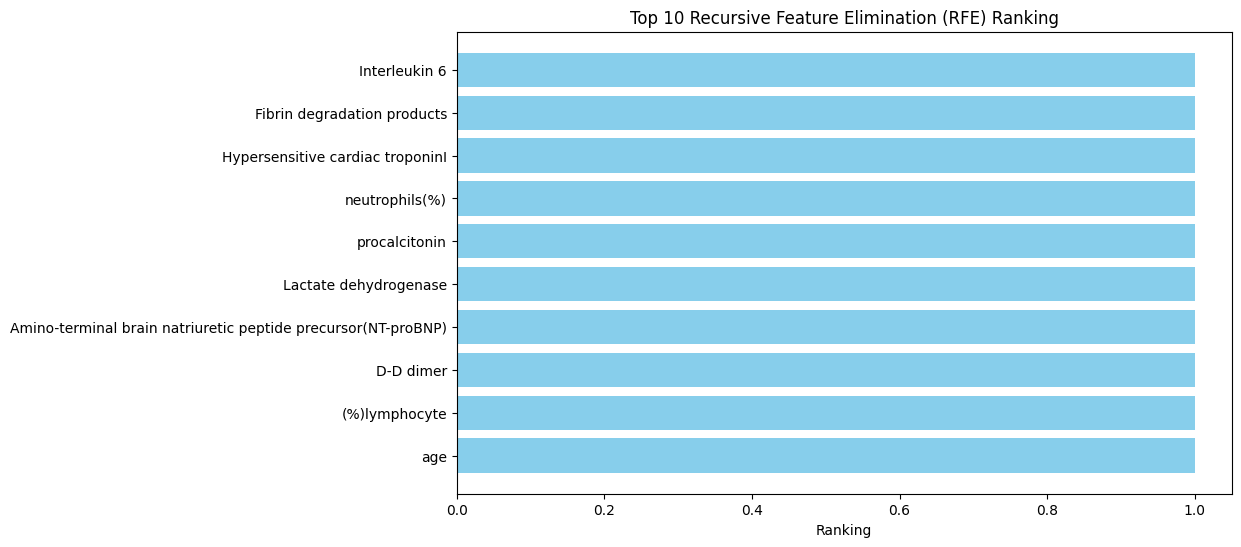

In [73]:
# Get the ranking of features
ranking = rfe.ranking_

# Get the names of features
feature_names = X_findfeatures.columns

# Create a DataFrame to store ranking information
ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': ranking})
ranking_df = ranking_df.sort_values(by='Ranking', ascending=True)

# Select only the top 10 features
top_10_features = ranking_df.head(10)

# Plot the feature ranking for the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Ranking'], color='skyblue')
plt.xlabel('Ranking')
plt.title('Top 10 Recursive Feature Elimination (RFE) Ranking')
plt.show()



In [5]:
# Feature selection based on common features
common_features = ['age', 
                   'procalcitonin', 'neutrophils(%)', 
                   '(%)lymphocyte',  
                   'Amino-terminal brain natriuretic peptide precursor(NT-proBNP)', 
                   'Lactate dehydrogenase', 
                   'Fibrin degradation products']

X = filled_data[common_features]

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Scale the features if needed
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
y = filled_data['outcome']

# Create a cross-validation object with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [55]:
model = RandomForestClassifier()

# Define hyperparameters for tuning
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}

# Grid search for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='f1')
grid_search.fit(X_scaled, y)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [43]:
# Choose a model (e.g., Random Forest) with the best hyperparameters
rf_model = RandomForestClassifier(max_depth = 20, min_samples_split = 2, n_estimators=200)

cross_val_scores_f1_rf = cross_val_score(rf_model, X_scaled, y, cv=cv, scoring='f1')
# Print individual F1 scores
print("Cross-Validation F1 Scores:", cross_val_scores_f1_rf)

# Obtain cross-validated predictions
y_pred_rf = cross_val_predict(rf_model, X_scaled, y, cv=cv)

accuracy_rf = accuracy_Sscore(y, y_pred_rf)
print("Accuracy:", accuracy_rf)
# Print classification report
print("Classification Report:\n", classification_report(y, y_pred_rf, digits=4))

Cross-Validation F1 Scores: [0.94285714 0.95774648 0.94444444 0.87323944 0.95652174]
Accuracy: 0.9466666666666667
Classification Report:
               precision    recall  f1-score   support

           0     0.9548    0.9453    0.9500       201
           1     0.9375    0.9483    0.9429       174

    accuracy                         0.9467       375
   macro avg     0.9461    0.9468    0.9464       375
weighted avg     0.9468    0.9467    0.9467       375



In [47]:
print(y_pred_rf)

[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1]


[[190  11]
 [  9 165]]


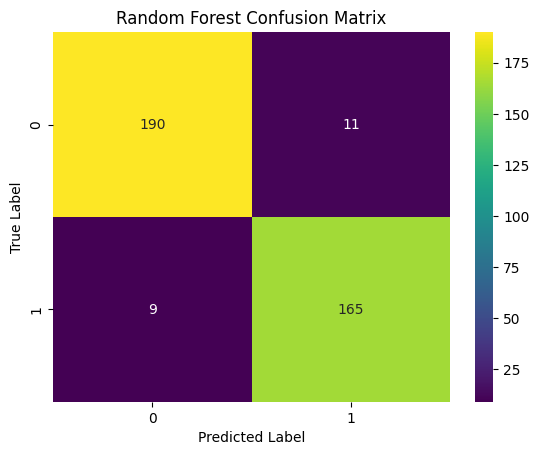

In [46]:
# Create and print confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y, y_pred_rf)
print(conf_matrix_rf)

sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap='viridis', xticklabels=[0, 1], yticklabels=[0, 1])

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

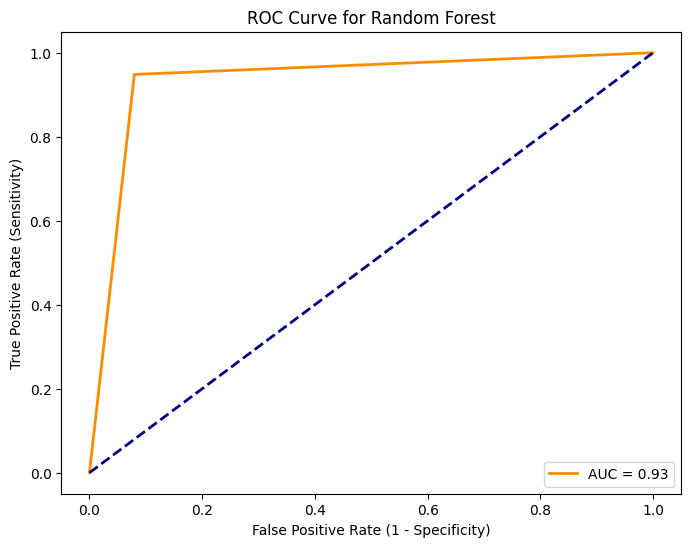

In [45]:
pr, tpr, thresholds = roc_curve(y, y_pred_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.show()

In [57]:
# SVM model for hyperparameter tuning
svm_model = SVC()

# Define parameters for grid search
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
}

# Grid search for hyperparameter tuning with cross-validation
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=cv, scoring='f1')
svm_grid_search.fit(X_scaled, y)

# Print the best hyperparameters for SVM
print("Best Hyperparameters for SVM:", svm_grid_search.best_params_)

Best Hyperparameters for SVM: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


In [25]:
svm_model = SVC(C=10, kernel='rbf', gamma='auto')

# Perform cross-validation and get F1 scores
cross_val_scores_f1_svm = cross_val_score(svm_model, X_scaled, y, cv=cv, scoring='f1')

# Print individual F1 scores for SVM
print("Cross-Validation F1 Scores for SVM:", cross_val_scores_f1_svm)

# Obtain cross-validated predictions for SVM
y_pred_svm = cross_val_predict(svm_model, X_scaled, y, cv=cv)

# Calculate and print accuracy for SVM
accuracy_svm = accuracy_score(y, y_pred_svm)
print("Accuracy for SVM:", accuracy_svm)

# Print classification report for SVM
print("Classification Report for SVM:\n", classification_report(y, y_pred_svm, digits=4))

Cross-Validation F1 Scores for SVM: [0.86111111 0.94117647 0.93150685 0.89855072 0.94117647]
Accuracy for SVM: 0.92
Classification Report for SVM:
               precision    recall  f1-score   support

           0     0.9296    0.9204    0.9250       201
           1     0.9091    0.9195    0.9143       174

    accuracy                         0.9200       375
   macro avg     0.9194    0.9200    0.9196       375
weighted avg     0.9201    0.9200    0.9200       375



[[185  16]
 [ 14 160]]


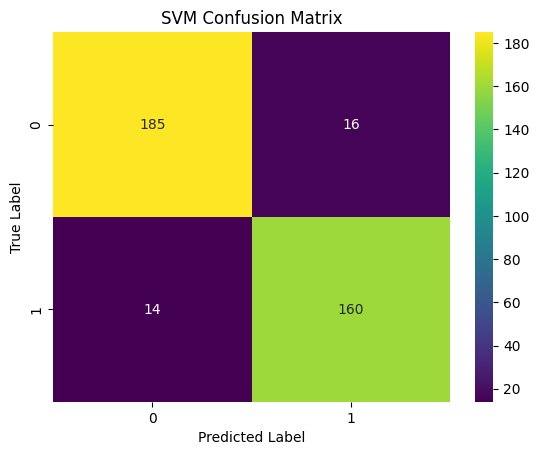

In [48]:
# Create and print confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y, y_pred_svm)
print(conf_matrix_svm)

sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='viridis', xticklabels=[0, 1], yticklabels=[0, 1])

plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

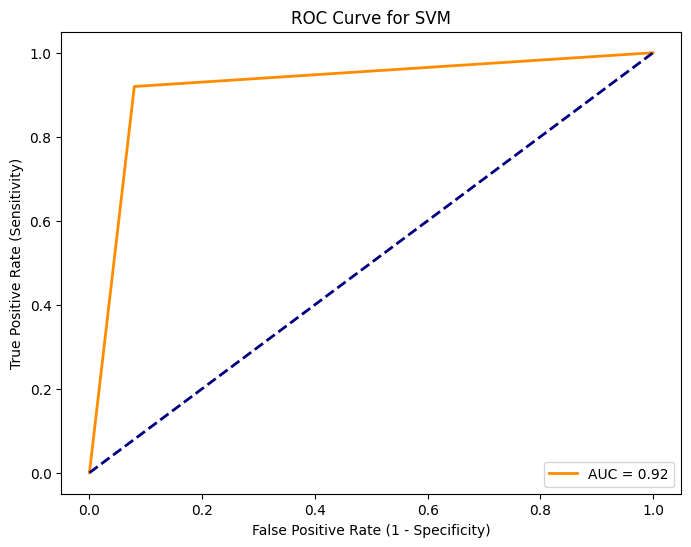

In [37]:
pr, tpr, thresholds = roc_curve(y, y_pred_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for SVM')
plt.legend(loc='lower right')
plt.show()

In [58]:
# Logistic Regression model for hyperparameter tuning
logreg_model = LogisticRegression()

# Define hyperparameters for tuning
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Grid search for hyperparameter tuning with cross-validation
logreg_grid_search = GridSearchCV(logreg_model, logreg_param_grid, cv=cv, scoring='f1')
logreg_grid_search.fit(X_scaled, y)

# Print the best hyperparameters for Logistic Regression
print("Best Hyperparameters for Logistic Regression:", logreg_grid_search.best_params_)


Best Hyperparameters for Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [35]:
# Instantiate Logistic Regression model with the best hyperparameters
logreg_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')

cross_val_scores_f1_logreg = cross_val_score(logreg_model, X_scaled, y, cv=cv, scoring='f1')

# Print individual F1 scores
print("Cross-Validation F1 Scores for Logistic Regression:", cross_val_scores_f1_logreg)

# Obtain cross-validated predictions
y_pred_logreg = cross_val_predict(logreg_model, X_scaled, y, cv=cv)

# Calculate and print accuracy for Logistic Regression
accuracy_logreg = accuracy_score(y, y_pred_logreg)
print("Accuracy for Logistic Regression:", accuracy_logreg)

# Print classification report for Logistic Regression
print("Classification Report for Logistic Regression:\n", classification_report(y, y_pred_logreg, digits=4))

Cross-Validation F1 Scores for Logistic Regression: [0.87323944 0.94117647 0.91891892 0.89855072 0.94117647]
Accuracy for Logistic Regression: 0.92
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.9296    0.9204    0.9250       201
           1     0.9091    0.9195    0.9143       174

    accuracy                         0.9200       375
   macro avg     0.9194    0.9200    0.9196       375
weighted avg     0.9201    0.9200    0.9200       375



[[185  16]
 [ 14 160]]


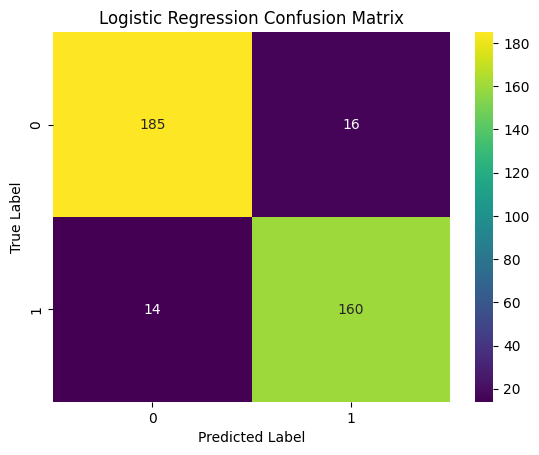

In [49]:
# Create and print confusion matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y, y_pred_logreg)
print(conf_matrix_logreg)

sns.heatmap(conf_matrix_logreg, annot=True, fmt="d", cmap='viridis', xticklabels=[0, 1], yticklabels=[0, 1])

plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

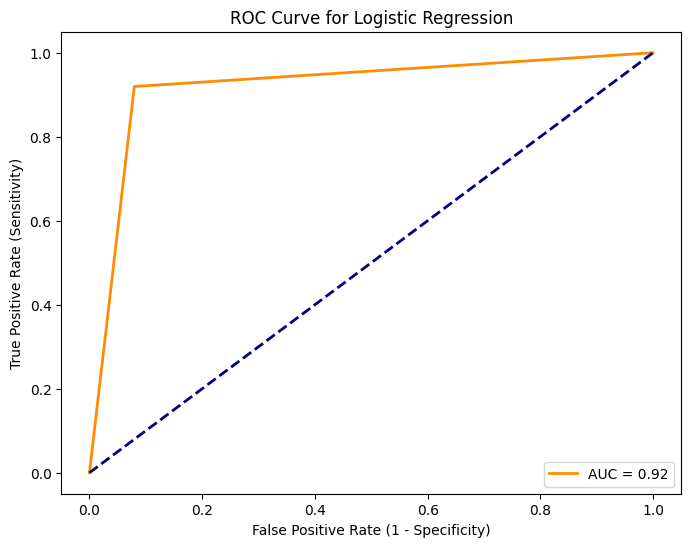

In [50]:
fpr, tpr, thresholds = roc_curve(y, y_pred_logreg)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

In [59]:
# Create KNN model
knn_model = KNeighborsClassifier()

# Define hyperparameters for tuning
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Grid search for hyperparameter tuning with cross-validation
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=cv, scoring='f1')
grid_search_knn.fit(X_scaled, y)

# Print the best hyperparameters
print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)


Best Hyperparameters for KNN: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [29]:
# Create the KNN model with the best hyperparameters
knn_model = KNeighborsClassifier(n_neighbors=9, weights='distance', p=1)

# Obtain cross-validated predictions
y_pred_knn = cross_val_predict(knn_model, X_scaled, y, cv=cv)

cross_val_scores_f1_knn = cross_val_score(knn_model, X_scaled, y, cv=cv, scoring='f1')
# Print individual F1 scores for KNN
print("Cross-Validation F1 Scores for KNN:", cross_val_scores_f1_knn)

# Calculate accuracy
accuracy_knn = accuracy_score(y, y_pred_knn)
print("Accuracy for KNN:", accuracy_knn)

# Print classification report
print("Classification Report for KNN:\n", classification_report(y, y_pred_knn, digits=4))

Cross-Validation F1 Scores for KNN: [0.89855072 0.89230769 0.91428571 0.89855072 0.94117647]
Accuracy for KNN: 0.9173333333333333
Classification Report for KNN:
               precision    recall  f1-score   support

           0     0.9087    0.9403    0.9242       201
           1     0.9281    0.8908    0.9091       174

    accuracy                         0.9173       375
   macro avg     0.9184    0.9156    0.9166       375
weighted avg     0.9177    0.9173    0.9172       375



[[189  12]
 [ 19 155]]


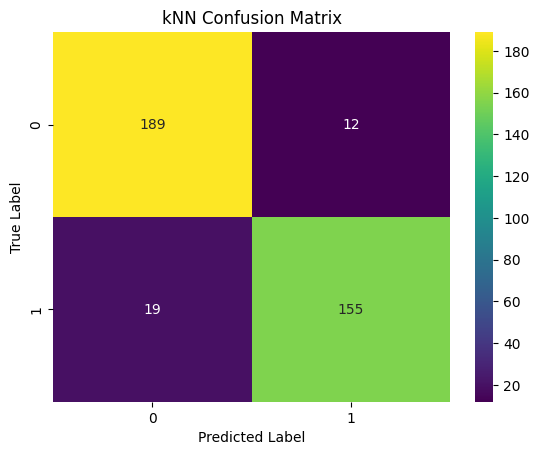

In [51]:
# Create and print confusion matrix for knn
conf_matrix_knn = confusion_matrix(y, y_pred_knn)
print(conf_matrix_knn)

sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='viridis', xticklabels=[0, 1], yticklabels=[0, 1])

plt.title('kNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

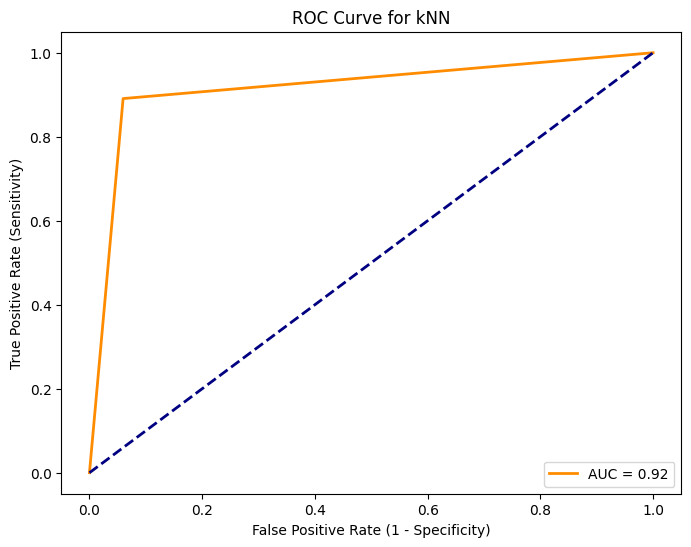

In [52]:
fpr, tpr, thresholds = roc_curve(y, y_pred_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for kNN')
plt.legend(loc='lower right')
plt.show()

In [31]:
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform cross-validation for evaluation
cross_val_scores_nb = cross_val_score(nb_model, X_scaled, y, cv=cv, scoring='f1')

# Print individual accuracy scores
print("Cross-Validation F1 Scores for Naive Bayes:", cross_val_scores_nb)

# Obtain cross-validated predictions
y_pred_nb = cross_val_predict(nb_model, X_scaled, y, cv=cv)

# Calculate accuracy
accuracy_nb = accuracy_score(y, y_pred_nb)
print("Accuracy for Naive Bayes:", accuracy_nb)

# Calculate and print metrics (e.g., classification report, confusion matrix)
print("Classification Report for Naive Bayes:\n", classification_report(y, y_pred_nb, digits=4))

Cross-Validation F1 Scores for Naive Bayes: [0.78688525 0.86153846 0.84848485 0.81818182 0.90909091]
Accuracy for Naive Bayes: 0.8666666666666667
Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0     0.8356    0.9353    0.8826       201
           1     0.9133    0.7874    0.8457       174

    accuracy                         0.8667       375
   macro avg     0.8744    0.8613    0.8642       375
weighted avg     0.8716    0.8667    0.8655       375



[[188  13]
 [ 37 137]]


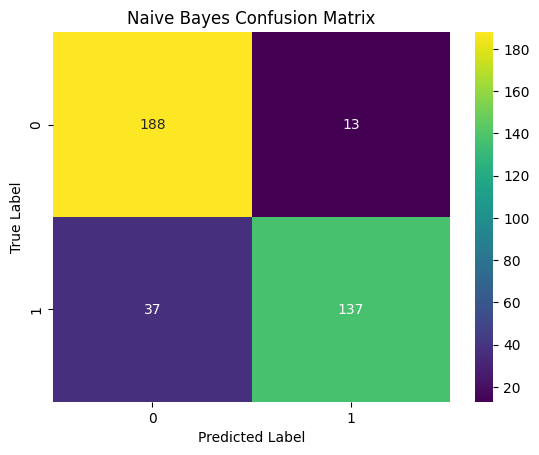

In [53]:
# Create and print confusion matrix for naive bayes
conf_matrix_nb = confusion_matrix(y, y_pred_nb)
print(conf_matrix_nb)

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap='viridis', xticklabels=[0, 1], yticklabels=[0, 1])

plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

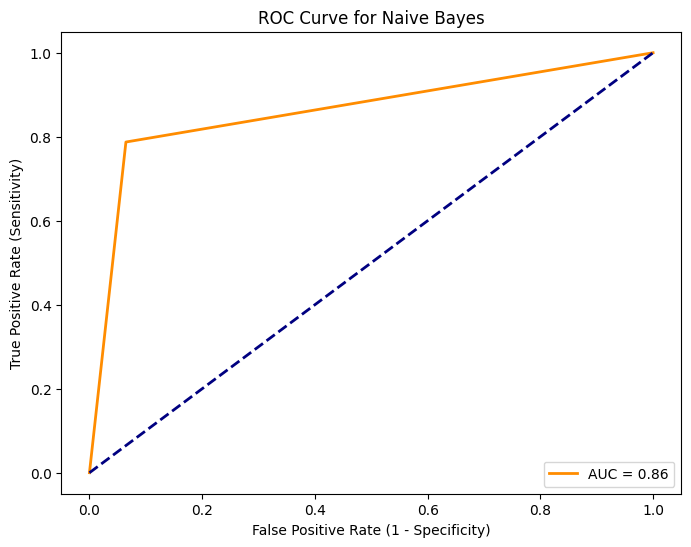

In [54]:
fpr, tpr, thresholds = roc_curve(y, y_pred_nb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
dummy_clf = DummyClassifier(strategy='stratified', random_state=42)

# Fit the baseline classifier on the training data
dummy_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dummy = dummy_clf.predict(X_test)

# Calculate accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred_dummy)
report = classification_report(y_test, y_pred_dummy, digits=4)

# Print the results
print("Baseline Classifier Accuracy:", accuracy)
print("Classification Report for Dummy Classifier:\n", report)

Baseline Classifier Accuracy: 0.5066666666666667
Classification Report for Dummy Classifier:
               precision    recall  f1-score   support

           0     0.6098    0.5435    0.5747        46
           1     0.3824    0.4483    0.4127        29

    accuracy                         0.5067        75
   macro avg     0.4961    0.4959    0.4937        75
weighted avg     0.5218    0.5067    0.5121        75

